In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

In [9]:
data = pd.read_csv('train.csv')

In [3]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df

In [37]:
data = text_to_dict(data)

In [11]:
na_revenue = data.loc[data['belongs_to_collection'].isna(), 'revenue']
col_revenue = data.loc[data['belongs_to_collection'].notnull(),'revenue']

In [12]:
print('Number of movies not in collection:',len(na_revenue))
print('Number of movies in collection:', len(col_revenue))

Number of movies not in collection: 2396
Number of movies in collection: 604


In [13]:
revs = [na_revenue, col_revenue]

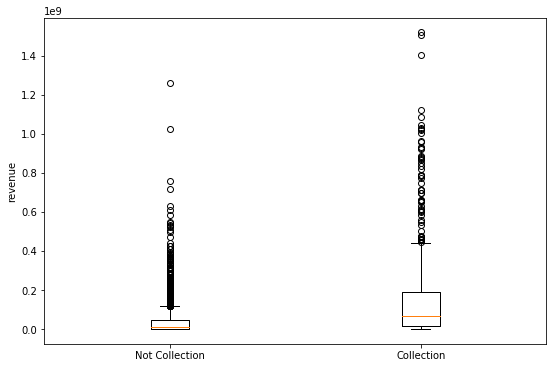

In [8]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(revs)
ax.set_xticklabels(['Not Collection', 'Collection'])
ax.set_ylabel('revenue')
fig.savefig('diffcollection.png', bbox_inches='tight')

In [13]:
q75n, q50n, q25n = np.percentile(revs[0], [75,50,25])
q75c, q50c, q25c = np.percentile(revs[1],[75,50,25])

print('Interquartile range for solo\n25%: {}\t50%: {}\t75%: {}'.format(q25n, q50n, q75n))
print('Interquartile range for collection\n25%: {}\t50%: {}\t75%: {}'.format(q25c, q50c, q75c))
print('Difference\n25%: {}\t50%: {}\t75%: {}'.format(q25n-q25c, q50n-q50c, q75n-q75c))

Interquartile range for solo
25%: 1500000.0	50%: 11407586.5	75%: 48037395.5
Interquartile range for collection
25%: 17244570.0	50%: 67417776.0	75%: 189376384.75
Difference
25%: -15744570.0	50%: -56010189.5	75%: -141338989.25


In [8]:
revs = [np.log(na_revenue), np.log(col_revenue)]

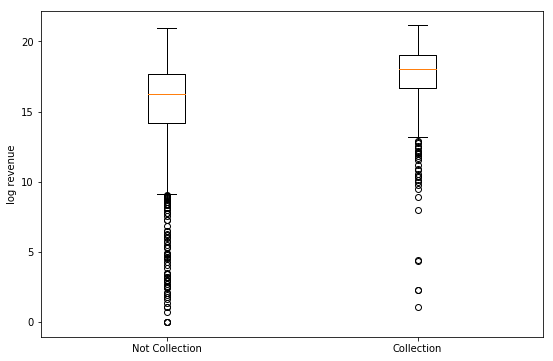

In [10]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(revs)
ax.set_xticklabels(['Not Collection', 'Collection'])
ax.set_ylabel('log revenue')
fig.savefig('logdiffcollection.png', bbox_inches='tight')

In [11]:
q75n, q50n, q25n = np.percentile(revs[0], [75,50,25])
q75c, q50c, q25c = np.percentile(revs[1],[75,50,25])

print('Interquartile range for solo\n25%: {}\t50%: {}\t75%: {}'.format(q25n, q50n, q75n))
print('Interquartile range for collection\n25%: {}\t50%: {}\t75%: {}'.format(q25c, q50c, q75c))
print('Difference\n25%: {}\t50%: {}\t75%: {}'.format(q25n-q25c, q50n-q50c, q75n-q75c))

#Correlation that belonging in a collection means higher revenue

Interquartile range for solo
25%: 14.22097566607244	50%: 16.249789111229923	75%: 17.687490280735595
Interquartile range for collection
25%: 16.66300140247109	50%: 18.026413714943857	75%: 19.059241616279774
Difference
25%: -2.4420257363986497	50%: -1.776624603713934	75%: -1.3717513355441788


In [19]:
use_data = pd.DataFrame()
use_data['iscollect'] = data['belongs_to_collection'].notnull().astype('int')
use_data['revenue'] = np.log(data['revenue'])

In [20]:
import json

In [21]:
genres = data['genres']

In [22]:
unique_genres = set()
for gen in genres:
    try:
        names = json.loads(gen.replace("'",'"'))
        name_list = [name['name'] for name in names]
        unique_genres.update(name_list)
    except:
        pass

In [23]:
list(unique_genres)

['Action',
 'History',
 'Western',
 'Science Fiction',
 'Family',
 'Crime',
 'Romance',
 'Adventure',
 'Thriller',
 'Horror',
 'Animation',
 'Foreign',
 'Mystery',
 'Music',
 'Fantasy',
 'TV Movie',
 'War',
 'Comedy',
 'Documentary',
 'Drama']

In [24]:
use_data = use_data.reindex(list(unique_genres)+['iscollect','revenue'],fill_value=0,axis='columns')

In [25]:
for i, gen in enumerate(genres):
    try:
        names = json.loads(gen.replace("'",'"'))
        name_list = [name['name'] for name in names]
        for n in name_list:
            use_data.at[i,n] = 1
    except:
        pass

In [26]:
use_data.head()

,Action,History,Western,Science Fiction,Family,Crime,Romance,Adventure,Thriller,Horror,...,Mystery,Music,Fantasy,TV Movie,War,Comedy,Documentary,Drama,iscollect,revenue
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,16.326300
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,18.370959
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,16.387512
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,16.588099
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15.182614


In [27]:
rev = data['revenue']

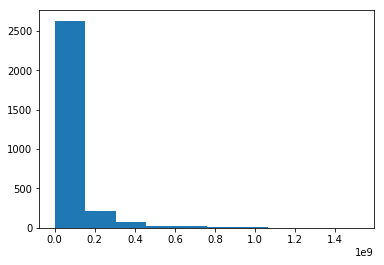

In [28]:
#Looks like the data has an exponential distribution
plt.hist(rev, bins=10)
plt.savefig('revhist.png')

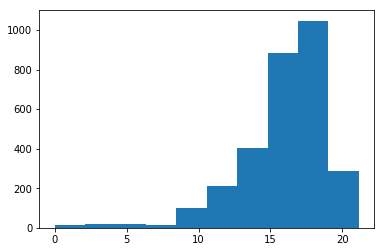

In [19]:
plt.hist(np.log(rev), bins=10)
plt.savefig('logrevhist.png')

In [29]:
print('Finding difference in log means\n')
sig_diff = []
for g in unique_genres:
    gen_rev = use_data.loc[use_data[g]==1,'revenue']
    nongen_rev = use_data.loc[use_data[g]==0,'revenue']
    diff = np.mean(gen_rev)-np.mean(nongen_rev)
    if abs(diff) < 0.4 or len(gen_rev) < 30:
        sig_diff.append(g)
    print(g[:7], np.mean(gen_rev), "\tnot",g[:7] , np.mean(nongen_rev), "\tdiff: ",diff, '\tnum: ', len(gen_rev))

Finding difference in log means

Action 16.852456260697842 	not Action 15.667115237726525 	diff:  1.1853410229713166 	num:  741
History 16.133612561134928 	not History 15.95189907710302 	diff:  0.18171348403190812 	num:  132
Western 15.344658647008904 	not Western 15.968841085349972 	diff:  -0.6241824383410677 	num:  43
Science 16.902018543992522 	not Science 15.859076765108275 	diff:  1.0429417788842468 	num:  290
Family 17.30978058785003 	not Family 15.831803086992798 	diff:  1.477977500857234 	num:  260
Crime 16.28921137388617 	not Crime 15.898871306538387 	diff:  0.39034006734778437 	num:  469
Romance 15.765643862191856 	not Romance 16.005558158044362 	diff:  -0.2399142958525058 	num:  571
Adventu 17.576902272998787 	not Adventu 15.682711172727402 	diff:  1.8941911002713852 	num:  439
Thrille 16.28132504652562 	not Thrille 15.845191293302854 	diff:  0.4361337532227658 	num:  789
Horror 16.084548945189756 	not Horror 15.945992656057491 	diff:  0.13855628913226425 	num:  301
Animati 

In [30]:
#Dropping columns where the difference in genre is not significant
use_data.drop(columns=sig_diff,inplace=True)

In [31]:
langs = data['original_language'].unique()
revs = []
for lang in langs:
    revs.append(np.log(data.loc[data['original_language'] == lang, 'revenue']))

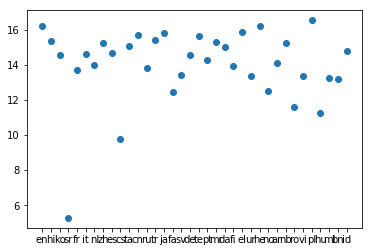

In [32]:
me = []
for r in revs:
    me.append(np.mean(r))
plt.scatter(y=me, x=langs)

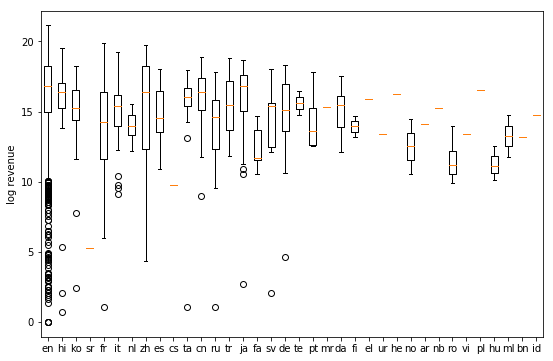

In [33]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(revs)
ax.set_xticklabels(langs)
ax.set_ylabel('log revenue')
fig.savefig('logdiffcollection.png', bbox_inches='tight')

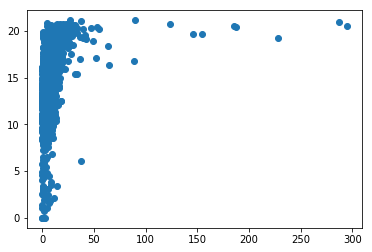

In [34]:
plt.scatter(x=data['popularity'], y=np.log(data['revenue']))

In [35]:
#Adding popularity as is, some correlation between poplarity and log revenue
use_data['popularity'] = data['popularity']

In [38]:
comps = data['production_companies']
unique_comp = set()
for comp in comps:
    name_list = [name['name'] for name in comp]
    unique_comp.update(name_list)

In [39]:
unique_comp

{'Henson Associates (HA)',
 'Yucaipa Films',
 'Taeoo Entertainment',
 'VOO',
 'The Kennedy/Marshall Company',
 'Blinding Edge Pictures',
 'Roth-Arnold Productions',
 'Myriapod Productions',
 'Lightstorm Entertainment',
 'Melvin Simon Productions',
 'Little Wing Films',
 'De Haven Productions',
 'Red Hawk Entertainment',
 'Rainbow Productions',
 'Timpson Films',
 'Lumanity Production',
 'TBS Radio & Communications',
 'Crystal Sky Pictures',
 'Linsefilm',
 'Alfran Productions',
 'MPH Entertainment Productions',
 'Senator International',
 "Centre National du Cinéma et de L'image Animée (CNC)",
 'Producers Sales Organization (PSO)',
 'Mirisch Films Limited',
 'Cannon Group',
 'Anka Film',
 'The Universal Film Mfg. Co.',
 'Pole Star',
 'Atmosphere Entertainment MM',
 'Laura Ziskin Productions',
 'Incorporated Television Company (ITC)',
 'Icon Entertainment International',
 'Vertigo Entertainment',
 '34th Street Films',
 'Junction Entertainment',
 'Starway International Inc.',
 'People Tree 

In [40]:
use_data.head()

,Action,Western,Science Fiction,Family,Adventure,Thriller,Animation,Foreign,Mystery,Fantasy,Documentary,Drama,iscollect,revenue,popularity
0,0,0,0,0,0,0,0,0,0,0,0,0,1,16.326300,6.575393
1,0,0,0,1,0,0,0,0,0,0,0,1,1,18.370959,8.248895
2,0,0,0,0,0,0,0,0,0,0,0,1,0,16.387512,64.299990
3,0,0,0,0,0,1,0,0,0,0,0,1,0,16.588099,3.174936
4,1,0,0,0,0,1,0,0,0,0,0,0,0,15.182614,1.148070
